In [31]:
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


In [32]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


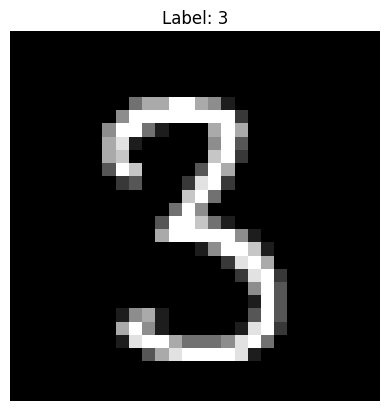

In [33]:
import matplotlib.pyplot as plt

plt.imshow(x_train[12334], cmap='gray')
plt.title(f"Label: {y_train[1234]}")
plt.axis('off')
plt.show()

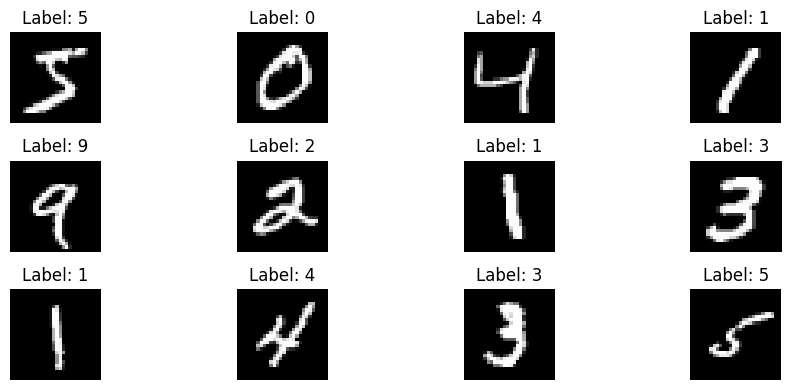

In [34]:
import matplotlib.pyplot as plt

num_images = 12
plt.figure(figsize=(10, 4))
for i in range(num_images):
    plt.subplot(3, 4, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


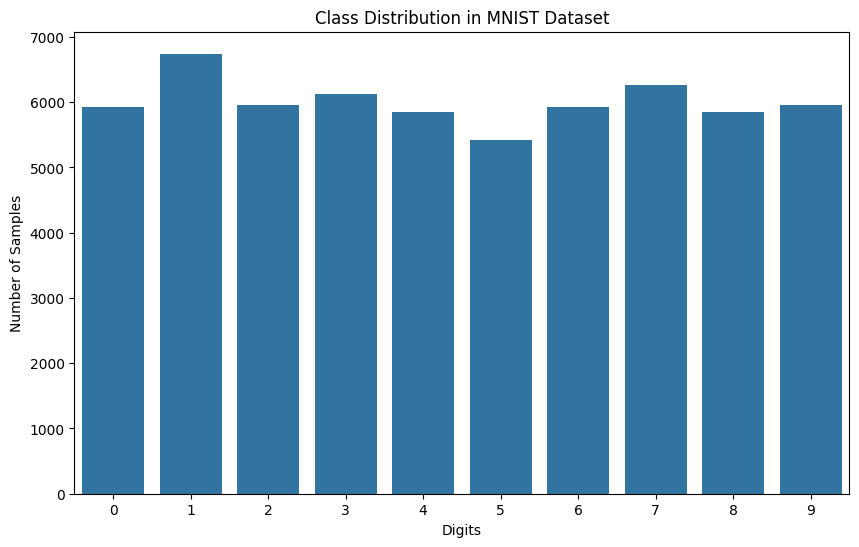

In [35]:
import seaborn as sns
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))
plt.title('Class Distribution in MNIST Dataset')
plt.xlabel('Digits')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()

In [36]:
base_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


c:\Users\neszm\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
# Normalize pixel values to [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

base_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#base_model.fit(x_train, y_train, epochs=5)
history = base_model.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test)  # Optional, for validation accuracy
)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8809 - loss: 0.4253 - val_accuracy: 0.9592 - val_loss: 0.1450
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9632 - loss: 0.1239 - val_accuracy: 0.9701 - val_loss: 0.0949
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9750 - loss: 0.0831 - val_accuracy: 0.9720 - val_loss: 0.0885
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9822 - loss: 0.0588 - val_accuracy: 0.9754 - val_loss: 0.0794
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9865 - loss: 0.0434 - val_accuracy: 0.9754 - val_loss: 0.0778


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


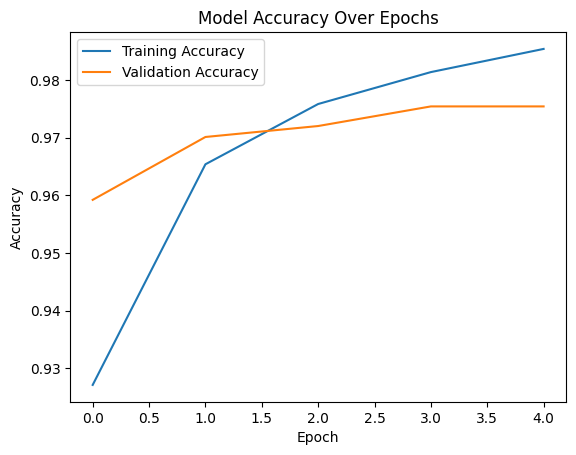

In [38]:
print(history.history.keys())  # Typically includes 'accuracy' and 'val_accuracy'

plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [39]:
CNNmodel = keras.Sequential([
    keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])


c:\Users\neszm\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
# Normalize pixel values to [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

CNNmodel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#CNNmodel.fit(x_train, y_train, epochs=5)
history = CNNmodel.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test)  # Optional, for validation accuracy
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5356 - loss: 1.6994 - val_accuracy: 0.8718 - val_loss: 0.4787
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8746 - loss: 0.4508 - val_accuracy: 0.8975 - val_loss: 0.3572
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8952 - loss: 0.3576 - val_accuracy: 0.9100 - val_loss: 0.3184
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9022 - loss: 0.3283 - val_accuracy: 0.9133 - val_loss: 0.3021
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9072 - loss: 0.3172 - val_accuracy: 0.9115 - val_loss: 0.3022


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


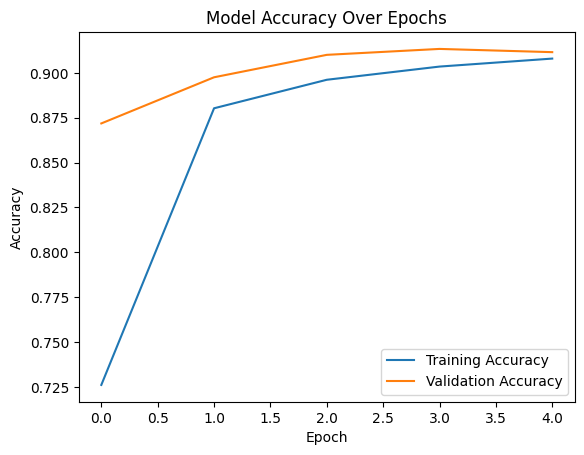

In [41]:
print(history.history.keys())  # Typically includes 'accuracy' and 'val_accuracy'

plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

what if we run them for longer does that help?

In [42]:
history = base_model.fit(
    x_train, y_train,
    epochs=15,
    validation_data=(x_test, y_test)  # Optional, for validation accuracy
)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3787 - loss: 2.1642 - val_accuracy: 0.6885 - val_loss: 1.4916
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7377 - loss: 1.2378 - val_accuracy: 0.8484 - val_loss: 0.6808
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8558 - loss: 0.6075 - val_accuracy: 0.8909 - val_loss: 0.4292
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8897 - loss: 0.4189 - val_accuracy: 0.9069 - val_loss: 0.3446
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9018 - loss: 0.3484 - val_accuracy: 0.9141 - val_loss: 0.3079
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9139 - loss: 0.3071 - val_accuracy: 0.9187 - val_loss: 0.2817
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9184 - loss: 0.2854 - val_accuracy: 0.9231 - val_loss: 0.2637
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9237 - loss: 0.2652 - 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


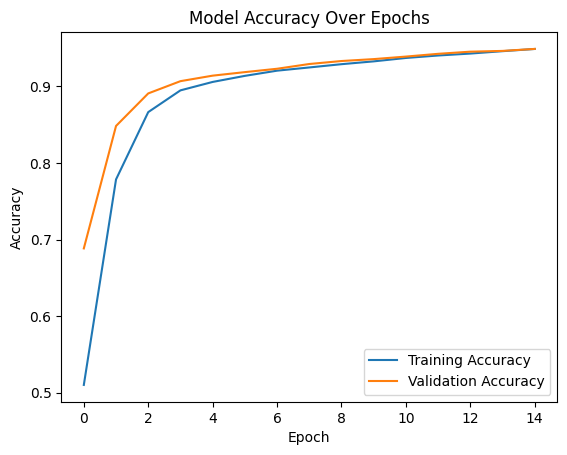

In [43]:
print(history.history.keys())  # Typically includes 'accuracy' and 'val_accuracy'

plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [44]:
history = CNNmodel.fit(
    x_train, y_train,
    epochs=15,
    validation_data=(x_test, y_test)  # Optional, for validation accuracy
)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9113 - loss: 0.3050 - val_accuracy: 0.9162 - val_loss: 0.2900
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9122 - loss: 0.3006 - val_accuracy: 0.9178 - val_loss: 0.2834
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9150 - loss: 0.2907 - val_accuracy: 0.9193 - val_loss: 0.2774
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9164 - loss: 0.2888 - val_accuracy: 0.9199 - val_loss: 0.2754
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9169 - loss: 0.2827 - val_accuracy: 0.9217 - val_loss: 0.2730
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9200 - loss: 0.2750 - val_accuracy: 0.9215 - val_loss: 0.2713
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9199 - loss: 0.2749 - val_accuracy: 0.9238 - val_loss: 0.2664
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9209 - loss: 0.2715 -

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


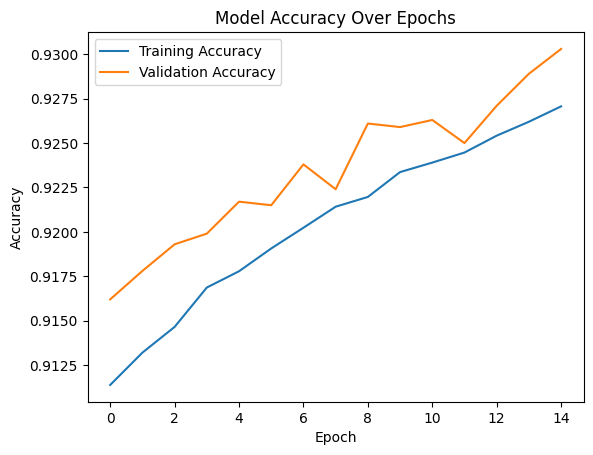

In [45]:
print(history.history.keys())  # Typically includes 'accuracy' and 'val_accuracy'

plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Extra visualizations on how the machine identifies the numbers

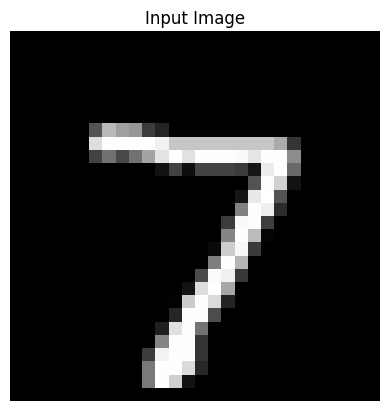

In [46]:
img = x_test[0]
plt.imshow(img.squeeze(), cmap='gray')
plt.title("Input Image")
plt.axis('off')
plt.show()

In [47]:
pred = np.argmax(CNNmodel.predict(img[np.newaxis, ...]))
print(f"Predicted class: {pred}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Predicted class: 7


In [48]:
for i, layer in enumerate(CNNmodel.layers):
    print(i, layer.name)

0 reshape_1
1 conv2d_1
2 max_pooling2d_1
3 flatten_3
4 dense_5


Kernel (3x3):
 [[ 0.05400338 -0.14491874  0.05064471]
 [ 0.02285618 -0.12620133 -0.08019842]
 [ 0.0023825  -0.13409358  0.01435251]]
Bias: -0.0060040615

Image Patch (3x3):
 [[0.00253749 0.00389081 0.00358324]
 [0.00387543 0.00369089 0.00227605]
 [0.00387543 0.00096886 0.        ]]

--- MANUAL CALCULATION ---
Dot Product (Patch * Kernel): -0.000925783917625814
Total Output (Dot + Bias): -0.0069298454675277765
❌ Result is <= 0. ReLU would make this BLACK.
Indices of Top 6 Active Filters: [ 8 13 11 31 28  9 15 25 14 22]
Activity values: [78.608574 53.087704 51.620903 18.893646 17.143473 16.320942 15.056247
 15.055272 14.451557 14.254278]
Indices of Top 6 Active Filters: [ 8 13 11 31 28  9 15 25 14 22]
Activity values: [78.608574 53.087704 51.620903 18.893646 17.143473 16.320942 15.056247
 15.055272 14.451557 14.254278]


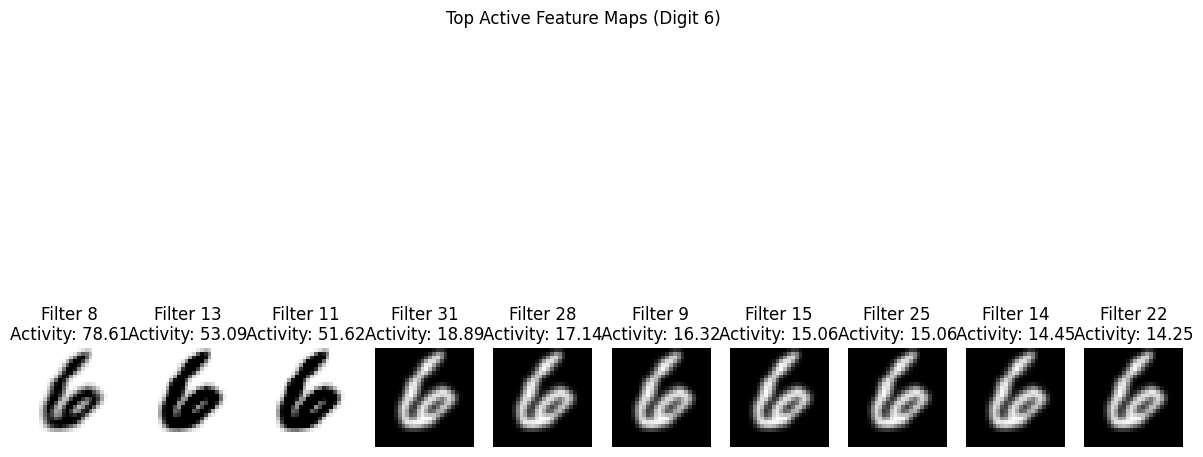

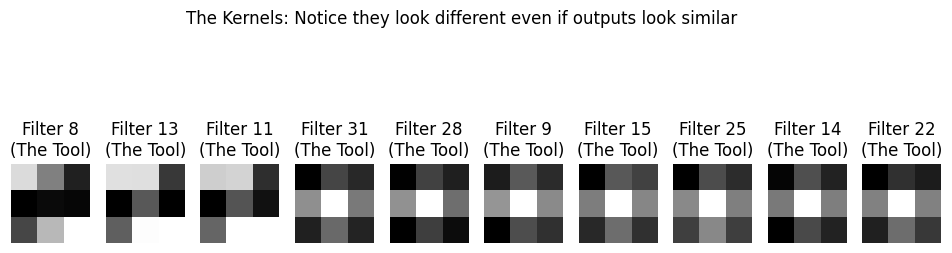

In [ ]:
import numpy as np

# 1. Get one filter and bias
weights = CNNmodel.layers[1].get_weights()[0] # (3, 3, 1, 32)
bias = CNNmodel.layers[1].get_weights()[1]    # (32,)

k = weights[:, :, 0, 0]  # First filter (3x3)
b = bias[0]              # First bias

print("Kernel (3x3):\n", k)
print("Bias:", b)

# 2. Get a small 3x3 patch from the input image
# (Pick a patch from the center where the digit '0' definitely has ink)
img_patch = img[14:17, 14:17] 

print("\nImage Patch (3x3):\n", img_patch)

# 3. Manually convolve
# Output = Sum(Patch * Kernel) + Bias
manual_conv = np.sum(img_patch * k) + b

print("\n--- MANUAL CALCULATION ---")
print(f"Dot Product (Patch * Kernel): {np.sum(img_patch * k)}")
print(f"Total Output (Dot + Bias): {manual_conv}")

if manual_conv <= 0:
    print("❌ Result is <= 0. ReLU would make this BLACK.")
else:
    print("✅ Result is POSITIVE. This pixel should be visible!")


import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# 1. SETUP FUNCTIONAL MODEL
inputs = tf.keras.Input(shape=(28, 28), name="input_layer")
x = tf.keras.layers.Reshape((28, 28, 1))(inputs)
# Use 'valid' padding to match original dimensions
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='valid', name='conv1')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), name='pool1')(x)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

functional_model = tf.keras.Model(inputs=inputs, outputs=outputs)
functional_model.set_weights(CNNmodel.get_weights())

# 2. GET ACTIVATIONS FOR A KNOWN DIGIT '0'
target_digit = 6
indices = np.where(y_train == target_digit)[0]
img = x_train[indices[0]]

layer_outputs = [functional_model.get_layer('conv1').output]
activation_model = tf.keras.Model(inputs=functional_model.input, outputs=layer_outputs)
activations = activation_model.predict(img[np.newaxis, ...], verbose=0)[0]

# 2. Calculate 'Total Activity' for each of the 32 filters
# Sum of all pixel values in each feature map
activity_per_filter = np.sum(activations, axis=(0, 1))

# 3. Find the indices of the Top 6 most active filters
# argsort gives indices from lowest to highest, so we reverse it with [::-1]
top_indices = np.argsort(activity_per_filter)[::-1][:10]

print(f"Indices of Top 6 Active Filters: {top_indices}")
print(f"Activity values: {activity_per_filter[top_indices]}")

# 4. Visualize ONLY these active filters
fig, axes = plt.subplots(1, 10, figsize=(15, 8))
for plot_idx, filter_idx in enumerate(top_indices):
    ax = axes[plot_idx]
    feature_map = activations[:, :, filter_idx]
    
    # Normalize: Scale 0 to 1 for visibility
    if feature_map.max() > 0:
        feature_map = (feature_map - feature_map.min()) / (feature_map.max() - feature_map.min())
    
    ax.imshow(feature_map, cmap='gray')
    ax.set_title(f'Filter {filter_idx}\nActivity: {activity_per_filter[filter_idx]:.2f}')
    ax.axis('off')

plt.suptitle(f"Top Active Feature Maps (Digit {target_digit})")
plt.show()

weights = CNNmodel.layers[1].get_weights()[0] # Get all weights from the first Conv2D layer

fig, axes = plt.subplots(1, 10, figsize=(12, 4))
for i, idx in enumerate(top_indices):
    ax = axes[i]
    # Get the specific 3x3 kernel for this filter
    kernel = weights[:, :, 0, idx]
    kernel_norm = (kernel - kernel.min()) / (kernel.max() - kernel.min())
    
    ax.imshow(kernel_norm, cmap='gray')
    ax.set_title(f"Filter {idx}")
    ax.axis('off')

plt.suptitle("The difference of kernels and active feature maps")
plt.show()
